In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [118]:
# import data
df = pd.read_csv('basic_project_timelines.csv')

In [119]:
df.dtypes

Project Name        object
Size Percentile    float64
Size                object
Start Date          object
End Date            object
dtype: object

In [120]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

# Convert to lowercase
df.columns = df.columns.str.lower()

In [121]:
# Convert date columns to datetime
date_columns = ['start_date', 'end_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

In [122]:
# Create column for the number of weeks between start and end dates
df['duration_weeks'] = (df['end_date'] - df['start_date']).dt.days / 7

## Plots using original T-shirt sizing

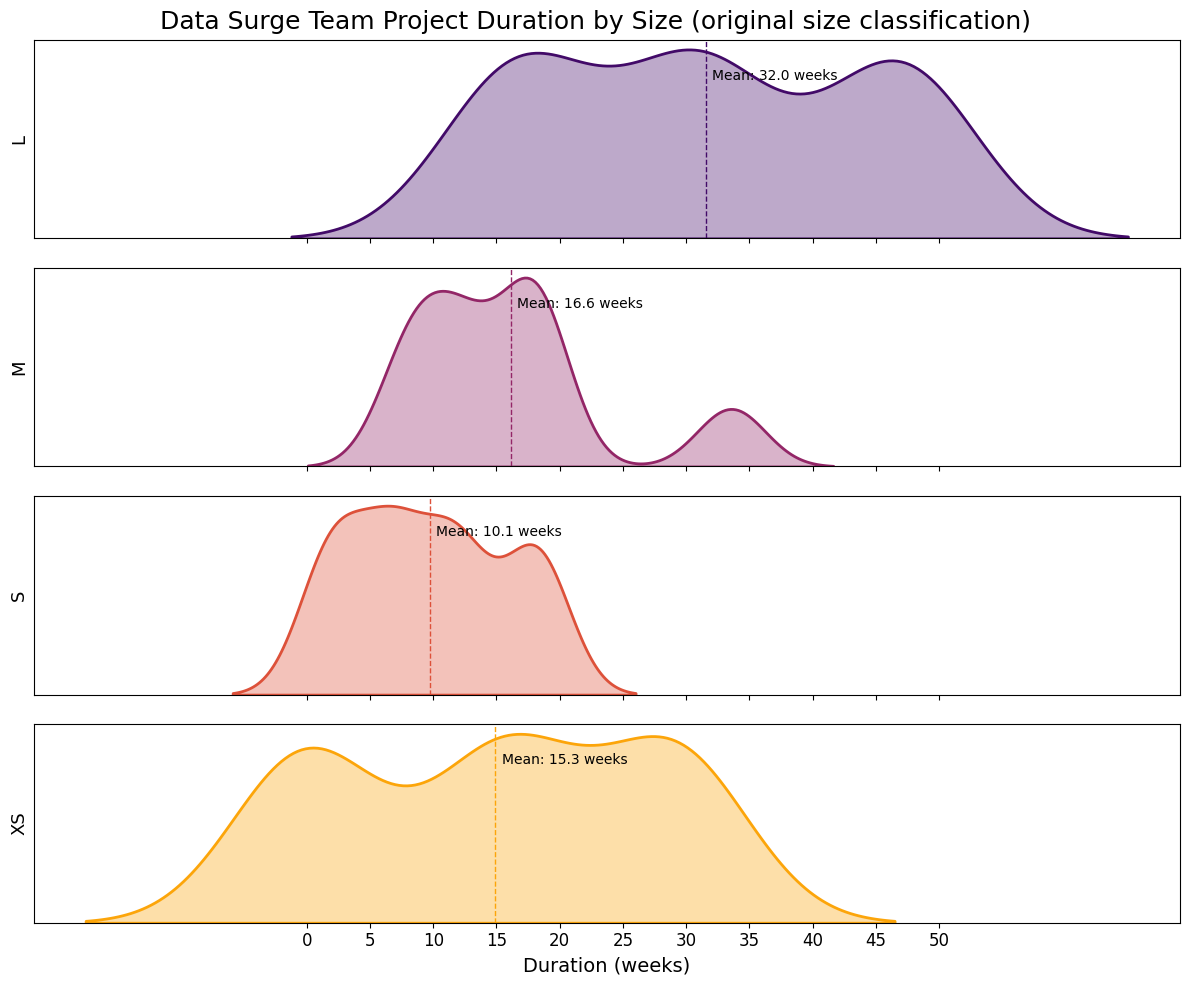

In [123]:
custom_order = ['L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(12, 10), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate KDE plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size'] == size]
    
    sns.kdeplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=True, alpha=0.35,
                linewidth=2, bw_adjust=0.5, ax=axes[i])
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity

    # mean duration line
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1] * 0.8, 
                 f'Mean: {mean_duration:.1f} weeks', color="black")

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Data Surge Team Project Duration by Size (original size classification)', fontsize=18, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()


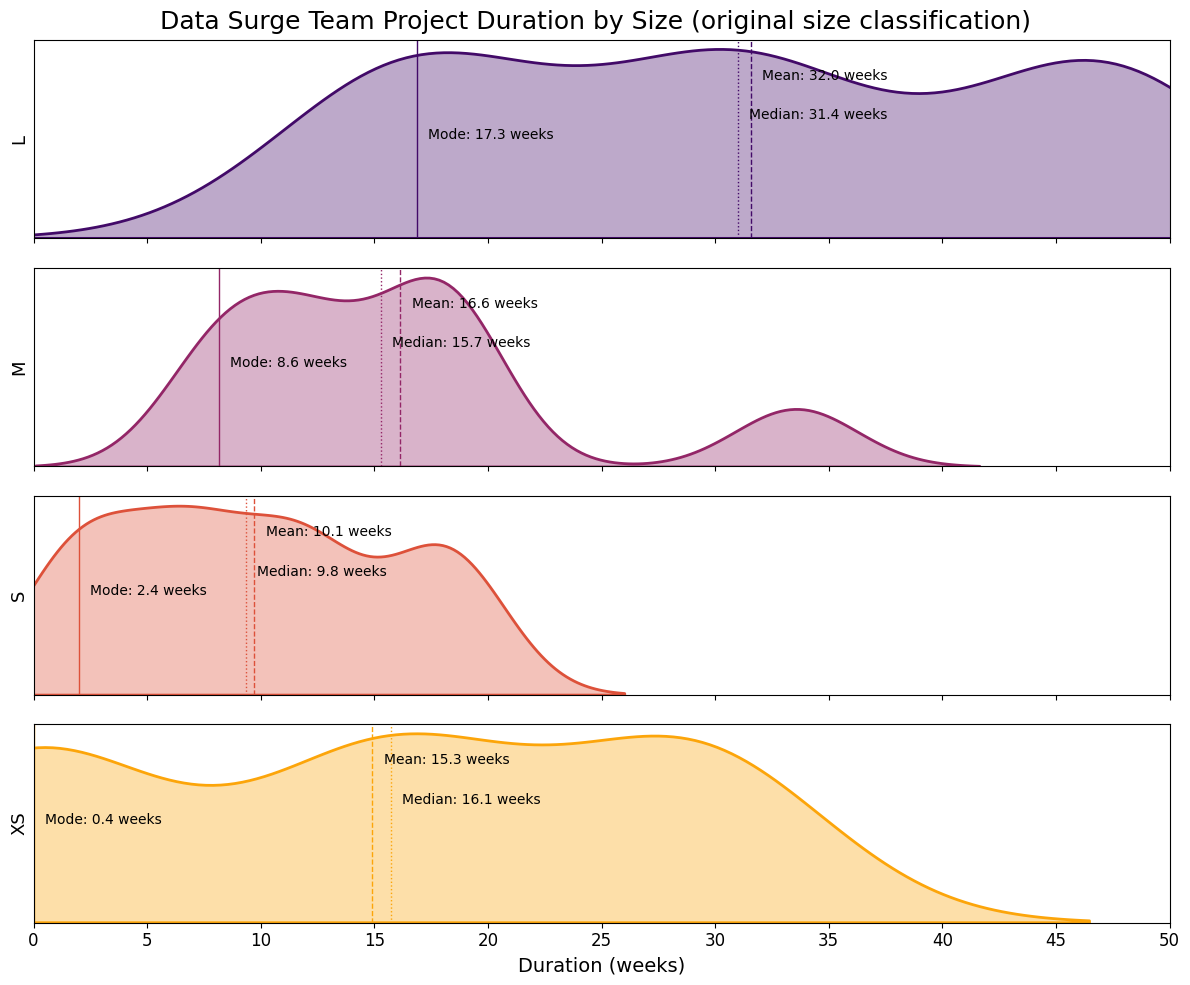

In [124]:
custom_order = ['L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(12, 10), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate KDE plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size'] == size]
    
    sns.kdeplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=True, alpha=0.35,
                linewidth=2, bw_adjust=0.5, ax=axes[i])
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity

    # mean duration line
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1] * 0.8, 
                 f'Mean: {mean_duration:.1f} weeks', color="black")
    
    #median duration line
    median_duration = size_data['duration_weeks'].median()
    axes[i].axvline(x=median_duration, color=palette[i], linestyle=':', linewidth=1)
    axes[i].text(median_duration + 0.5, axes[i].get_ylim()[1] * 0.6, 
                 f'Median: {median_duration:.1f} weeks', color="black")
    
    #mode duration line
    mode_duration = size_data['duration_weeks'].mode()[0]
    axes[i].axvline(x=mode_duration, color=palette[i], linestyle='-', linewidth=1)
    axes[i].text(mode_duration + 0.5, axes[i].get_ylim()[1] * 0.5, 
                 f'Mode: {mode_duration:.1f} weeks', color="black")
    axes[i].set_xlim(x_min, x_max)

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Data Surge Team Project Duration by Size (original size classification)', fontsize=18, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()


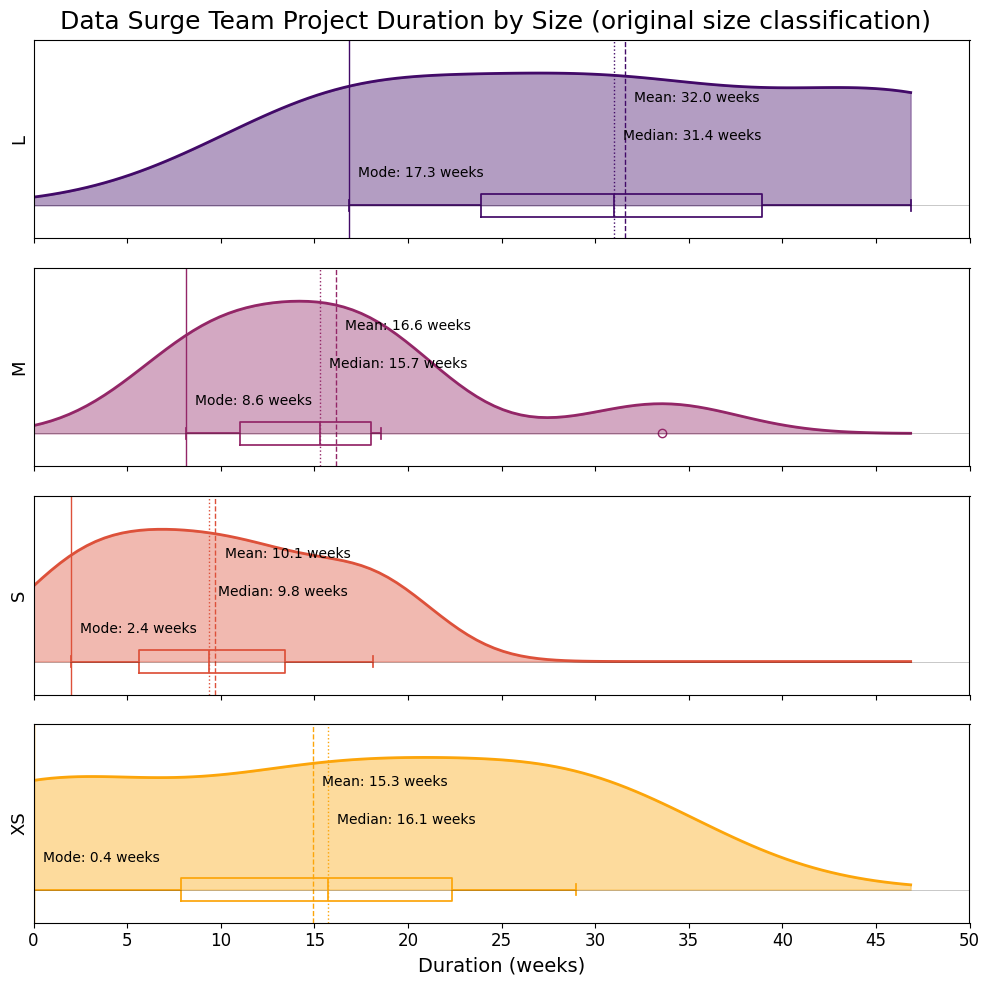

In [125]:
custom_order = ['L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(10, 10), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate boxplot plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size'] == size]
    
    # Create boxplot FIRST at y=0 with explicit width control
    sns.boxplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=False, 
                linewidth=1.25, ax=axes[i], width=0.07, zorder=2)
    
    # Generate KDE using scipy AFTER the boxplot
    data = size_data['duration_weeks'].dropna()
    if len(data) > 1:  # Check if we have enough data points
        x_kde = np.linspace(x_min, x_max, 100)
        kde = stats.gaussian_kde(data, bw_method=0.5)
        y_kde = kde(x_kde)
        
        # Scale the KDE
        y_kde = y_kde / np.max(y_kde) * 0.4  # Scale to appropriate height
        
        # Plot the KDE above the x-axis with the curve arching upward
        axes[i].fill_between(x_kde, 0, y_kde, color=palette[i], alpha=0.4, zorder=1)
        axes[i].plot(x_kde, y_kde, color=palette[i], linewidth=2, zorder=1)
    
    # mean duration line
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1] * -5.5, 
                 f'Mean: {mean_duration:.1f} weeks', color="black")
    
    #median duration line
    median_duration = size_data['duration_weeks'].median()
    axes[i].axvline(x=median_duration, color=palette[i], linestyle=':', linewidth=1)
    axes[i].text(median_duration + 0.5, axes[i].get_ylim()[1] * -3.5, 
                 f'Median: {median_duration:.1f} weeks', color="black")
    
    #mode duration line
    mode_duration = size_data['duration_weeks'].mode()[0]
    axes[i].axvline(x=mode_duration, color=palette[i], linestyle='-', linewidth=1)
    axes[i].text(mode_duration + 0.5, axes[i].get_ylim()[1] * -1.5, 
                 f'Mode: {mode_duration:.1f} weeks', color="black")
    axes[i].set_xlim(x_min, x_max)
    
    # Set y-axis limits to show the full KDE curve above the boxplot
    axes[i].set_ylim(-0.1, 0.5)  # Adjusted to show the full upward curve
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity
    
    # Add horizontal line at y=0
    axes[i].axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Data Surge Team Project Duration by Size (original size classification)', fontsize=18, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()

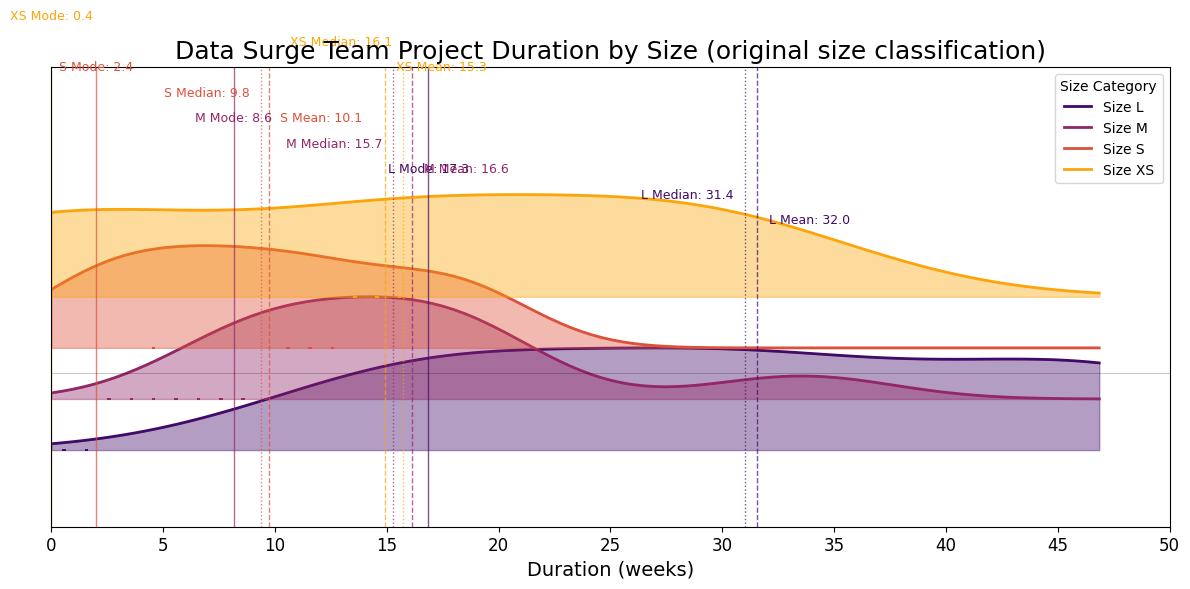

In [126]:
custom_order = ['L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a single figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Vertical offset for each size to avoid overlap
offsets = [-0.15, -0.05, 0.05, 0.15]

# Create combined plot with all sizes
for i, size in enumerate(custom_order):
    size_data = df[df['size'] == size]
    color = palette[i]
    
    # Apply vertical offset for this size category
    offset = offsets[i]
    
    # Create boxplot with offset
    sns.boxplot(data=size_data, x='duration_weeks', y=np.zeros(len(size_data)) + offset,
                color=color, fill=False, linewidth=1.25, ax=ax, width=0.07, zorder=2)
    
    # Generate KDE using scipy
    data = size_data['duration_weeks'].dropna()
    if len(data) > 1:  # Check if we have enough data points
        x_kde = np.linspace(x_min, x_max, 100)
        kde = stats.gaussian_kde(data, bw_method=0.5)
        y_kde = kde(x_kde)
        
        # Scale the KDE
        y_kde = y_kde / np.max(y_kde) * 0.2  # Scale to appropriate height
        
        # Plot the KDE above the offset
        ax.fill_between(x_kde, offset, offset + y_kde, color=color, alpha=0.4, zorder=1)
        ax.plot(x_kde, offset + y_kde, color=color, linewidth=2, zorder=1, label=f'Size {size}')
    
    # Statistical markers
    mean_duration = size_data['duration_weeks'].mean()
    median_duration = size_data['duration_weeks'].median()
    mode_duration = size_data['duration_weeks'].mode()[0]
    
    # Add vertical lines for statistics in a more compact way
    ax.axvline(x=mean_duration, color=color, linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(x=median_duration, color=color, linestyle=':', linewidth=1, alpha=0.7)
    ax.axvline(x=mode_duration, color=color, linestyle='-', linewidth=1, alpha=0.7)
    
    # Add text annotations for statistics (positioned strategically to avoid overlap)
    vertical_pos = 0.3 + i * 0.1  # Stagger the text positions vertically
    ax.text(mean_duration + 0.5, vertical_pos, f'{size} Mean: {mean_duration:.1f}', 
            color=color, fontsize=9, ha='left', va='center')
    ax.text(median_duration - 0.5, vertical_pos + 0.05, f'{size} Median: {median_duration:.1f}', 
            color=color, fontsize=9, ha='right', va='center')
    ax.text(mode_duration, vertical_pos + 0.1, f'{size} Mode: {mode_duration:.1f}', 
            color=color, fontsize=9, ha='center', va='center')

# Set axis properties
ax.set_xlim(x_min, x_max)
ax.set_ylim(-0.3, 0.6)  # Adjusted to show all KDEs
ax.set_yticks([])  # Remove y-ticks
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)

# Add horizontal line at y=0
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Add legend, title and labels
ax.legend(title='Size Category', loc='upper right')
plt.title('Data Surge Team Project Duration by Size (original size classification)', fontsize=18)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.show()

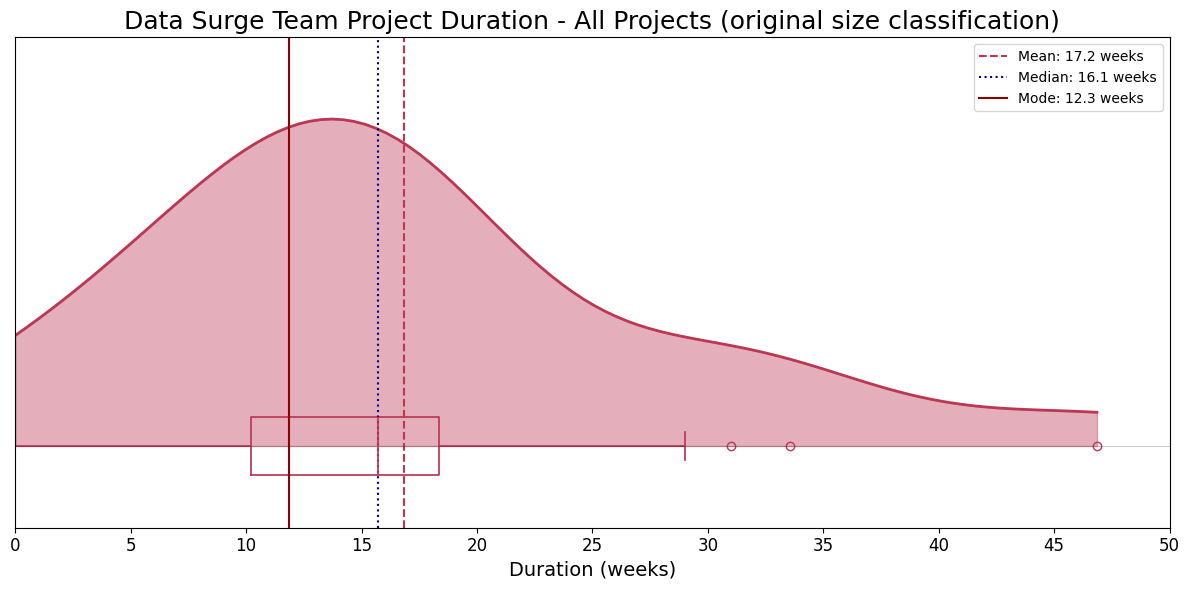

In [127]:
# Create a single figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Use a single color for the combined data
main_color = sns.color_palette("inferno", 3)[1]  # Middle color from inferno palette

# Create boxplot for all data
sns.boxplot(data=df, x='duration_weeks', 
            color=main_color, fill=False, 
            linewidth=1.25, ax=ax, width=0.07, zorder=2)

# Generate KDE using scipy
data = df['duration_weeks'].dropna()
if len(data) > 1:  # Check if we have enough data points
    x_kde = np.linspace(x_min, x_max, 100)
    kde = stats.gaussian_kde(data, bw_method=0.5)
    y_kde = kde(x_kde)
    
    # Scale the KDE
    y_kde = y_kde / np.max(y_kde) * 0.4  # Scale to appropriate height
    
    # Plot the KDE above the x-axis
    ax.fill_between(x_kde, 0, y_kde, color=main_color, alpha=0.4, zorder=1)
    ax.plot(x_kde, y_kde, color=main_color, linewidth=2, zorder=1)

# Add statistical markers
mean_duration = df['duration_weeks'].mean()
median_duration = df['duration_weeks'].median()
mode_duration = df['duration_weeks'].mode()[0]

# Add vertical lines for statistics
ax.axvline(x=mean_duration, color=main_color, linestyle='--', linewidth=1.5, label=f'Mean: {mean_duration:.1f} weeks')
ax.axvline(x=median_duration, color='darkblue', linestyle=':', linewidth=1.5, label=f'Median: {median_duration:.1f} weeks')
ax.axvline(x=mode_duration, color='darkred', linestyle='-', linewidth=1.5, label=f'Mode: {mode_duration:.1f} weeks')

# Set axis properties
ax.set_xlim(x_min, x_max)
ax.set_ylim(-0.1, 0.5)  # Adjusted to show the full KDE
ax.set_yticks([])  # Remove y-ticks
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)

# Add horizontal line at y=0
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Add legend, title and labels
ax.legend(loc='upper right')
plt.title('Data Surge Team Project Duration - All Projects (original size classification)', fontsize=18)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.show()

## Plots using Percentiles

In [128]:
df['duration_weeks'].describe()

count    19.000000
mean     17.248120
std      11.476570
min       0.428571
25%      10.642857
50%      16.142857
75%      18.785714
max      47.285714
Name: duration_weeks, dtype: float64

In [129]:
# Use qcut to divide into 5 equal-sized groups with labels
df['size_percentile'] = pd.qcut(df['duration_weeks'], 
                               q=5, 
                               labels=['XS', 'S', 'M', 'L', 'XL'])

In [130]:
df

,project_name,size_percentile,size,start_date,end_date,duration_weeks
0,ACF ML Shared Environment,L,M,2024-02-26,2024-07-08,19.000000
1,ANA Disbursement Model,XS,XS,2024-03-19,2024-03-22,0.428571
2,Analyze USG AI Inventory,S,S,2024-05-20,2024-08-14,12.285714
3,ECD Tribal Home Visit Performance,S,M,2024-04-03,2024-06-05,9.000000
4,NLP On GFE Testing,S,M,2024-05-20,2024-08-14,12.285714
5,OA Workforce Engagement Explanation,M,L,2024-03-11,2024-07-10,17.285714
6,OHS NPRM Comment Analysis,S,XL,2023-11-13,2024-02-09,12.571429
7,OCC Integrated Dashboards,L,S,2024-03-29,2024-08-06,18.571429
8,OEA Outreach Lists,XS,S,2024-07-08,2024-08-28,7.285714
9,OFA Policy Knowledge Base Data Migration,L,M,2024-06-14,2024-10-18,18.000000


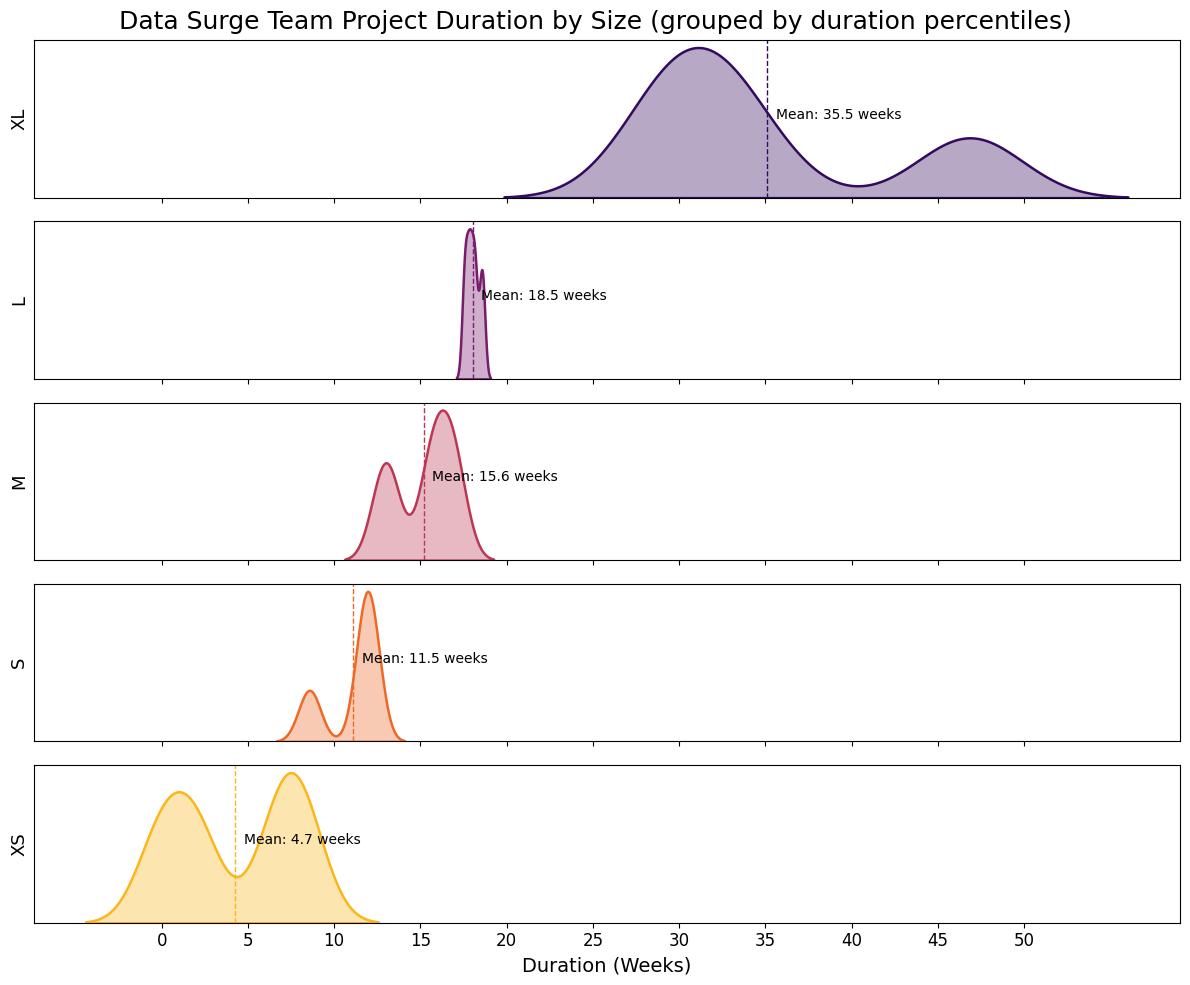

In [131]:
custom_order = ['XL','L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(12, 10), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate KDE plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size_percentile'] == size]
    
    sns.kdeplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=True, alpha=0.35,
                linewidth=1.8, bw_adjust=0.5, ax=axes[i])
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity

    # mean duration line
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1] * 0.5, 
                 f'Mean: {mean_duration:.1f} weeks', color="black", fontsize=10)

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Data Surge Team Project Duration by Size (grouped by duration percentiles)', fontsize=18, y=0.98)
plt.xlabel('Duration (Weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()


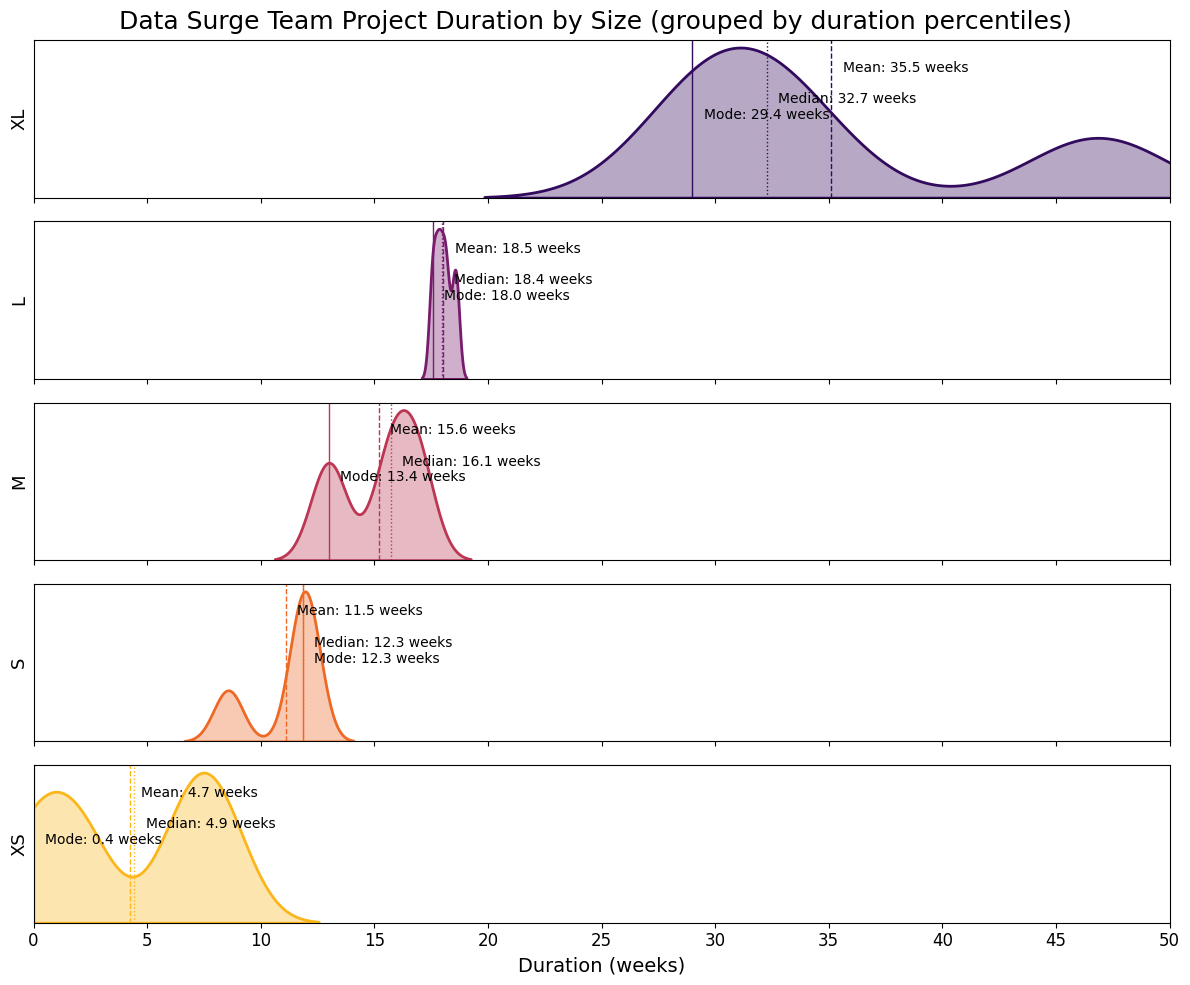

In [132]:
custom_order = ['XL', 'L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(12, 10), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate KDE plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size_percentile'] == size]
    
    sns.kdeplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=True, alpha=0.35,
                linewidth=2, bw_adjust=0.5, ax=axes[i])
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity

    # mean duration line
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1] * 0.8, 
                 f'Mean: {mean_duration:.1f} weeks', color="black")
    
    #median duration line
    median_duration = size_data['duration_weeks'].median()
    axes[i].axvline(x=median_duration, color=palette[i], linestyle=':', linewidth=1)
    axes[i].text(median_duration + 0.5, axes[i].get_ylim()[1] * 0.6, 
                 f'Median: {median_duration:.1f} weeks', color="black")
    
    #mode duration line
    mode_duration = size_data['duration_weeks'].mode()[0]
    axes[i].axvline(x=mode_duration, color=palette[i], linestyle='-', linewidth=1)
    axes[i].text(mode_duration + 0.5, axes[i].get_ylim()[1] * 0.5, 
                 f'Mode: {mode_duration:.1f} weeks', color="black")
    axes[i].set_xlim(x_min, x_max)

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Data Surge Team Project Duration by Size (grouped by duration percentiles)', fontsize=18, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()


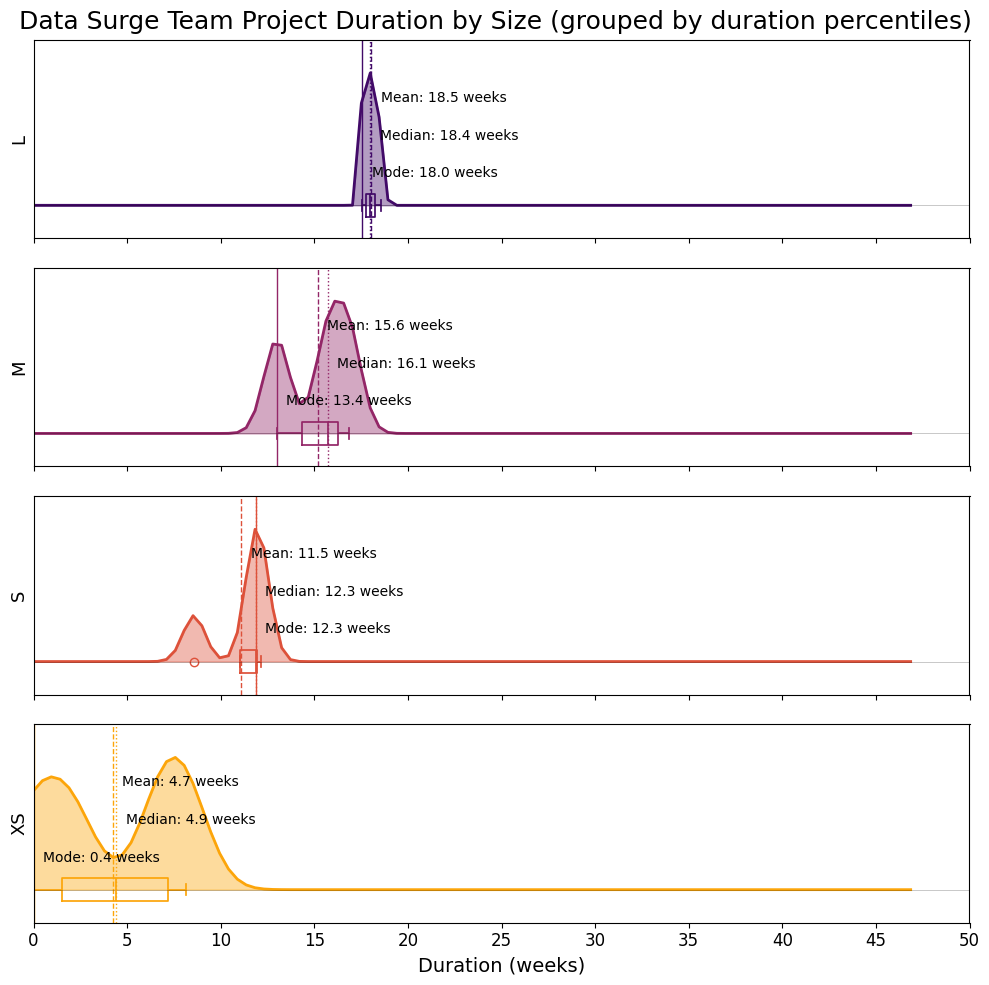

In [133]:
custom_order = ['L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(10, 10), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate boxplot plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size_percentile'] == size]
    
    # Create boxplot FIRST at y=0 with explicit width control
    sns.boxplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=False, 
                linewidth=1.25, ax=axes[i], width=0.07, zorder=2)
    
    # Generate KDE using scipy AFTER the boxplot
    data = size_data['duration_weeks'].dropna()
    if len(data) > 1:  # Check if we have enough data points
        x_kde = np.linspace(x_min, x_max, 100)
        kde = stats.gaussian_kde(data, bw_method=0.35)
        y_kde = kde(x_kde)
        
        # Scale the KDE
        y_kde = y_kde / np.max(y_kde) * 0.4  # Scale to appropriate height
        
        # Plot the KDE above the x-axis with the curve arching upward
        axes[i].fill_between(x_kde, 0, y_kde, color=palette[i], alpha=0.4, zorder=1)
        axes[i].plot(x_kde, y_kde, color=palette[i], linewidth=2, zorder=1)
    
    # mean duration line
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1] * -5.5, 
                 f'Mean: {mean_duration:.1f} weeks', color="black")
    
    #median duration line
    median_duration = size_data['duration_weeks'].median()
    axes[i].axvline(x=median_duration, color=palette[i], linestyle=':', linewidth=1)
    axes[i].text(median_duration + 0.5, axes[i].get_ylim()[1] * -3.5, 
                 f'Median: {median_duration:.1f} weeks', color="black")
    
    #mode duration line
    mode_duration = size_data['duration_weeks'].mode()[0]
    axes[i].axvline(x=mode_duration, color=palette[i], linestyle='-', linewidth=1)
    axes[i].text(mode_duration + 0.5, axes[i].get_ylim()[1] * -1.5, 
                 f'Mode: {mode_duration:.1f} weeks', color="black")
    axes[i].set_xlim(x_min, x_max)
    
    # Set y-axis limits to show the full KDE curve above the boxplot
    axes[i].set_ylim(-0.1, 0.5)  # Adjusted to show the full upward curve
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity
    
    # Add horizontal line at y=0
    axes[i].axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Data Surge Team Project Duration by Size (grouped by duration percentiles)', fontsize=18, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()